In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [156]:
df=pd.read_csv('walmart_data.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
#getting the shape of the data
df.shape

(550068, 10)

In [157]:
#checking for  null values and the columns we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


#changing numerical to categorical data

In [158]:
df[['Occupation','Marital_Status','Product_Category']]=df[['Occupation','Marital_Status','Product_Category']].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  object
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  object
 8   Product_Category            550068 non-null  object
 9   Purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


**so here no null values...

In [126]:
#describing the data
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [127]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


#Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

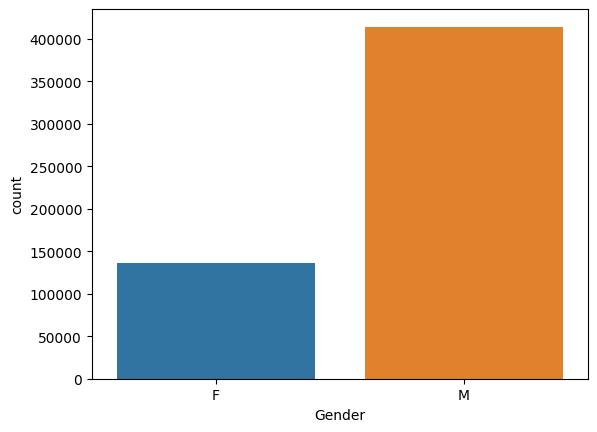

In [ ]:
sns.countplot(x='Gender',data=df)

***Male count are more than female count

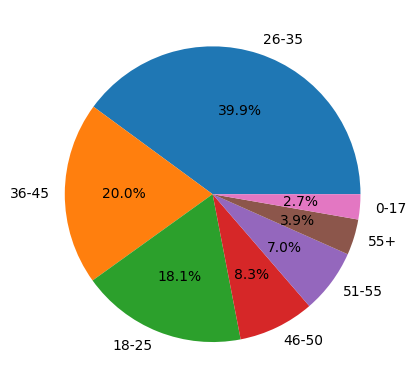

In [ ]:
#Analyzing the  age count category
age_count=df['Age'].value_counts()
plt.pie(data=df,labels=age_count.index,x=age_count.values,autopct='%1.1f%%')
plt.show()

**Around 26-25 age buys the products more

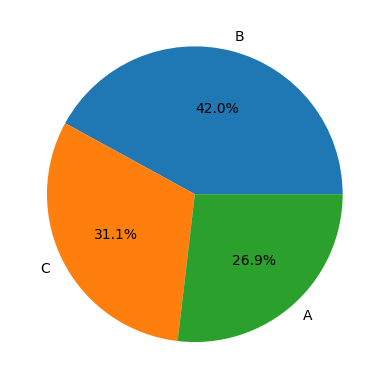

In [ ]:
#Analyzing the city category
age_count=df['City_Category'].value_counts()
plt.pie(data=df,labels=age_count.index,x=age_count.values,autopct='%1.1f%%')
plt.show()

#Bivariate Analysis

<Axes: xlabel='Purchase', ylabel='Gender'>

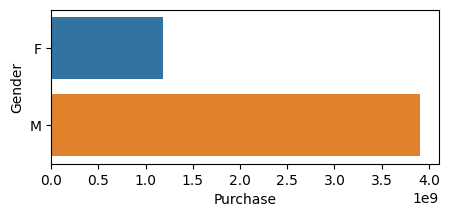

In [ ]:
#purchase behaviour of male and female customers
gender_df=df.groupby('Gender')['Purchase'].sum().reset_index()
fig=plt.figure(figsize=(5,2))
sns.barplot(y='Gender',x='Purchase',data=gender_df,orient='h')

#3)Data exploration

In [9]:
#Analyzing the male purchase
male=df[df['Gender']=='M']['Purchase']
#caluculating the average of the male
male_avg=male.mean()
male_avg

9437.526040472265

In [10]:
##Analyzing the female purchase
female=df[df['Gender']=='F']['Purchase']
#caluculating the average of the male
female_avg=female.mean()
female_avg

8734.565765155476

###use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.*

## #Interval of population mean of male

In [90]:
#95% confidence interval-to find population mean
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=male.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-(conf/100))/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=male_avg,n=len(df),conf=95)

sample mean: 9437.526040472265
population standard deviation: 5092.18620977797
standard error: 6.865878061558824
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9424.069166749367, 9450.982914195163]


In [91]:
#90% confidence interval-to find population mean
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=male.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=male_avg,n=len(df),conf=90)

sample mean: 9437.526040472265
population standard deviation: 5092.18620977797
standard error: 6.865878061558824
z1: -1.6448536269514729 z2: 1.6448536269514722
Population mean lies between: [9426.232676040503, 9448.819404904027]


In [92]:
#99% confidence interval-to find population mean
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=male.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=male_avg,n=len(df),conf=99)

sample mean: 9437.526040472265
population standard deviation: 5092.18620977797
standard error: 6.865878061558824
z1: -2.5758293035489004 z2: 2.5758293035489004
Population mean lies between: [9419.840710566708, 9455.211370377821]


***Thus from above we can infere,population mean of male purchase lies between 9,420 to 9,450

## #Interval of population mean of female

In [89]:
#95% confidence interval-to find population mean of female
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=female.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=female_avg,n=len(df),conf=95)

sample mean: 8734.565765155476
population standard deviation: 4767.233289291458
standard error: 6.42773871710129
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [8721.967628767923, 8747.163901543028]


In [88]:
#99% confidence interval-to find population mean of female
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=female.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=female_avg,n=len(df),conf=99)

sample mean: 8734.565765155476
population standard deviation: 4767.233289291458
standard error: 6.42773871710129
z1: -2.5758293035489004 z2: 2.5758293035489004
Population mean lies between: [8718.009007412411, 8751.12252289854]


**so from above we can infere that population mean female purchases ranges between 8,718 to 8,750

**Thus we can conclude that male purchase more than females

### 4)Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.

## #Taking sample of 100 customers

<Axes: ylabel='Count'>

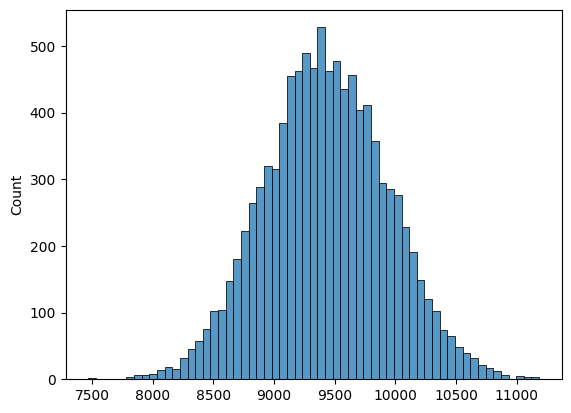

In [95]:
#Taking sample of 100 male purchases
male_samp=[male.sample(100).mean() for i in range(10000)]
male_samp=np.array(male_samp)
sns.histplot(male_samp)


In [97]:
#95% confidence interval-to find population mean of male
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=male_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=1-norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=male_samp.mean(),n=100,conf=95)


sample mean: 9428.652976000001
population standard deviation: 508.32697748363057
standard error: 50.83269774836306
z1: -1.959963984540054 z2: -0.959963984540054
Population mean lies between: [9329.022719176199, 9379.855416924562]


In [100]:
#99% confidence interval-to find population mean of male
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=male_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 99% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=male_samp.mean(),n=100,conf=99)


sample mean: 9428.652976000001
population standard deviation: 508.32697748363057
standard error: 50.83269774836306
z1: -2.5758293035489004 z2: 2.5758293035489004
Population mean lies between: [9297.716623561324, 9559.589328438678]


**Thus we can see that after taking 100 samples also we get the male purchase population mean around 9,300 to 9,500

> Indented block



## #Interval of population mean of female

<Axes: ylabel='Count'>

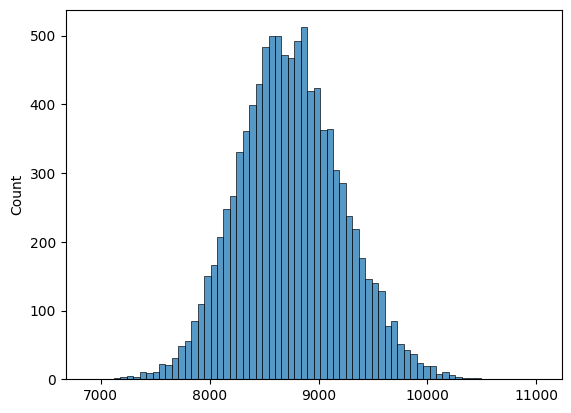

In [35]:
#Taking sample of 100 female purchases
male_samp=[female.sample(100).mean() for i in range(10000)]
female_samp=np.array(male_samp)
sns.histplot(female_samp)

In [85]:
#95% confidence interval-to find population mean of female
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=female_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=female_samp.mean(),n=100,conf=95)

sample mean: 8742.402897999998
population standard deviation: 477.16756129492035
standard error: 47.71675612949203
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [8648.879774527113, 8835.926021472884]


In [84]:
#99% confidence interval-to find population mean of female
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=female_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=female_samp.mean(),n=100,conf=99)

sample mean: 8742.402897999998
population standard deviation: 477.16756129492035
standard error: 47.71675612949203
z1: -2.5758293035489004 z2: 2.5758293035489004
Population mean lies between: [8619.492679291356, 8865.313116708641]


**Thus we can see that after taking 50 samples also we get the male purchase population mean around 8,600 to 8,900

**Thus we can conclude that population mean of female and male purchases will be fall around 8000 to 9000(even if we change sample size is 100 also)**bold text**

In [40]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


### 5)Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?
---

--- By seeing population mean of both male and female we can conclude that both are overlapping(i.e,there is no significance differnece bewteen males and female purchase),so walmart can improve by using strategies like customer personolization,customer feedback,diverse product range,pricing startegies

#Analyzing the purchase of marital_status

##**Taking sample of 500-Married purchases

In [149]:
married=df[df['Marital_Status']=='1']['Purchase']
#Taking sample of 500 married purchases
married_samp=np.array([married.sample(500).mean() for i in range(10000)])
mu_married=married_samp.mean()
mu_married

9258.4100512

In [150]:
#95% confidence interval-to find population mean of married purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=married_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu_married,n=500,conf=95)

sample mean: 9258.4100512
population standard deviation: 221.6342466681983
standard error: 9.911784833840953
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9238.983309903162, 9277.836792496839]


In [151]:
#90% confidence interval-to find population mean of married purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=married_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 90% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu_married,n=500,conf=90)

sample mean: 9258.4100512
population standard deviation: 221.6342466681983
standard error: 9.911784833840953
z1: -1.6448536269514729 z2: 1.6448536269514722
Population mean lies between: [9242.106615966495, 9274.713486433506]


***so from above we can see that population mean of married purchases fall aroud 9200 to 9300

**Taking sample of 500-Unmarried purchases

In [152]:
unmarried=df[df['Marital_Status']=='0']['Purchase']
#Taking sample of 500 unmarried purchases
unmarried_samp=np.array([unmarried.sample(500).mean() for i in range(10000)])
mu_unmarried=unmarried_samp.mean()
mu_unmarried

9262.998587600001

In [153]:
#95% confidence interval-to find population mean of unmarried purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=unmarried_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu_unmarried,n=500,conf=95)

sample mean: 9262.998587600001
population standard deviation: 222.89721047672788
standard error: 9.968266292420836
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9243.461144678551, 9282.53603052145]


In [154]:
#99% confidence interval-to find population mean of unmarried purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=unmarried_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 99% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu_unmarried,n=500,conf=99)

sample mean: 9262.998587600001
population standard deviation: 222.89721047672788
standard error: 9.968266292420836
z1: -2.5758293035489004 z2: 2.5758293035489004
Population mean lies between: [9237.322035178404, 9288.675140021598]


***so from above we can see that population mean of unmarried purchases fall aroud 9200 to 9300

**Thus,the population mean of unmarried and married people purchase fall around 9,200 to 9,300

#Analysing the Age category

In [132]:
df.groupby('Age')['Purchase'].sum().sort_values(ascending=False)

Age
26-35    2031770578
36-45    1026569884
18-25     913848675
46-50     420843403
51-55     367099644
55+       200767375
0-17      134913183
Name: Purchase, dtype: int64

**0-17 age purchase

In [161]:
young=df[df['Age']=='0-17']['Purchase']
#Taking sample of 500 age(0-17) purchases
young_samp=np.array([young.sample(500).mean() for i in range(10000)])
young_samp.mean()

8934.0590002

In [162]:
#95% confidence interval-to find population mean of age(0-17) purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=young_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=young_samp.mean(),n=500,conf=95)

sample mean: 8934.0590002
population standard deviation: 225.30699584495818
standard error: 10.076035170311783
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [8914.31033415923, 8953.807666240771]


**18-25 age purchase

In [163]:
adult=df[df['Age']=='18-25']['Purchase']
#Taking sample of 500 age(18-25) purchases
adult_samp=np.array([adult.sample(500).mean() for i in range(10000)])
adult_samp.mean()

9167.0240258

In [164]:
#95% confidence interval-to find population mean of age(18-25) purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=adult_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=adult_samp.mean(),n=500,conf=95)

sample mean: 9167.0240258
population standard deviation: 223.75249514418678
standard error: 10.006515785551864
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9147.411615249586, 9186.636436350413]


**26-35 age purchase

In [174]:
youth=df[df['Age']=='18-25']['Purchase']
#Taking sample of 500 age(26-35) purchases
youth_samp=np.array([youth.sample(500).mean() for i in range(10000)])
youth_samp.mean()

9167.037432599998

In [166]:
#95% confidence interval-to find population mean of age(26-35) purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=youth_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=youth_samp.mean(),n=500,conf=95)

sample mean: 9171.599387400001
population standard deviation: 223.68084075833656
standard error: 10.003311303998922
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9151.993257518021, 9191.205517281982]


**36-45 age purchase

In [167]:
middle_age=df[df['Age']=='18-25']['Purchase']
#Taking sample of 500 age(18-25) purchases
middle_age_samp=np.array([middle_age.sample(500).mean() for i in range(10000)])
middle_age_samp.mean()

9168.1348756

In [168]:
#95% confidence interval-to find population mean of age(36-45) purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=middle_age_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=middle_age_samp.mean(),n=500,conf=95)

sample mean: 9168.1348756
population standard deviation: 225.59996626340822
standard error: 10.089137205732799
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9148.360530041682, 9187.90922115832]


**46-50 age

In [170]:
old_age=df[df['Age']=='46-50']['Purchase']
#Taking sample of 500 age(46-50) purchases
old_age_samp=np.array([old_age.sample(500).mean() for i in range(10000)])
old_age_samp.mean()

9210.4497996

In [171]:
#95% confidence interval-to find population mean of age(46-50) purchases
def conf(mu,n,conf):
  print('sample mean:',mu)
  std_sample=old_age_samp.std()#sample standard deviation
  #since we know sample std_dev= population std_dev (for n>=30)
  print('population standard deviation:',std_sample)
  std_pop=std_sample
  std_err=std_pop/np.sqrt(n)
  print('standard error:',std_err)
  slice=(1-conf/100)/2
  z1=norm.ppf(slice)
  z2=norm.ppf(1-slice)
  print('z1:',z1,'z2:',z2)
  #calucating the population mean within 95% interval
  x1=z1*std_err+mu
  x2=z2*std_err+mu
  print('Population mean lies between:',[x1,x2])
conf(mu=old_age_samp.mean(),n=500,conf=95)

sample mean: 9210.4497996
population standard deviation: 220.66330302464306
standard error: 9.868362914054735
z1: -1.959963984540054 z2: 1.959963984540054
Population mean lies between: [9191.108163702082, 9229.791435497917]


**Thus the age group of all categories of purchase falls around 9000

# Insights

---Gender: Similar spending between males and females suggests no significant gender-based differences. Walmart can use more inclusive marketing strategies that appeal to a broader audience.

---Marital Status: Comparable spending for married and unmarried individuals indicates that marital status might not strongly influence purchasing behavior. Walmart can focus on universal offerings.

---Age Categories: Uniform spending across age groups implies that Walmart's products resonate across generations. Prioritizing cross-generational products can maintain broad appeal.

#Recommendations

---Versatile Products: Emphasize products with broad appeal, avoiding over-segmentation based on gender, marital status, or age.

---Personalized Experience: Utilize customer data for personalized recommendations and promotions to cater to individual preferences.

---Feedback Utilization: Integrate customer feedback to fine-tune offerings and enhance service quality.

---Cross-Generational Focus: Develop products that bridge generation gaps, appealing to a wider audience.

---Value-Centric Promotions: Design promotions centered around practical benefits for all customer segments.